# Your info

Full name: Melika Nobakhtian

Student ID: 97522094

# Q1. Kohonen

In [90]:
# Q1_graded
# Do not change the above line.

# Type your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import regularizers
import math
from sklearn.utils import shuffle

In [91]:
# Q1_graded
# Do not change the above line.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Create a balanced dataset from MNIST - We have 500 samples from each number

dataset_count = 0
idx = 0
zero = 0; one = 0; two = 0; three = 0; four = 0; five = 0; six = 0; seven = 0; eight = 0; nine = 0
dataset_x = []
dataset_y = []
while dataset_count != 5000:
  if y_train[idx] == 0 and zero < 500:
    dataset_x.append(x_train[idx])
    dataset_y.append(0)
    dataset_count +=1
    zero += 1
    idx +=1
    continue

  if y_train[idx] == 1 and one < 500:
    dataset_x.append(x_train[idx])
    dataset_y.append(1)
    dataset_count +=1
    one += 1
    idx +=1
    continue


  if y_train[idx] == 2 and two < 500:
    dataset_x.append(x_train[idx])
    dataset_y.append(2)
    dataset_count +=1
    two += 1
    idx +=1
    continue


  if y_train[idx] == 3 and three < 500:
    dataset_x.append(x_train[idx])
    dataset_y.append(3)
    dataset_count +=1
    three += 1
    idx +=1
    continue


  if y_train[idx] == 4 and four < 500:
    dataset_x.append(x_train[idx])
    dataset_y.append(4)
    dataset_count +=1
    four += 1
    idx +=1
    continue


  if y_train[idx] == 5 and five < 500:
    dataset_x.append(x_train[idx])
    dataset_y.append(5)
    dataset_count +=1
    five += 1
    idx +=1
    continue

  if y_train[idx] == 6 and six < 500:
    dataset_x.append(x_train[idx])
    dataset_y.append(6)
    dataset_count +=1
    six += 1
    idx +=1
    continue

  if y_train[idx] == 7 and seven < 500:
    dataset_x.append(x_train[idx])
    dataset_y.append(7)
    dataset_count +=1
    seven += 1
    idx +=1
    continue

  if y_train[idx] == 8 and eight < 500:
    dataset_x.append(x_train[idx])
    dataset_y.append(8)
    dataset_count +=1
    eight += 1
    idx +=1
    continue

  if y_train[idx] == 9 and nine < 500:
    dataset_x.append(x_train[idx])
    dataset_y.append(9)
    dataset_count +=1
    nine += 1
    idx +=1
    continue

  idx +=1



dataset_x = np.array(dataset_x)
dataset_y = np.array(dataset_y)
dataset_y = np.reshape(dataset_y, (5000,1))

11501568/11490434 [==============================] - 0s 0us/step


In [92]:
# Q1_graded
class KohonenMap:

  def __init__(
      self,
      x,
      y,
      input_size,
      neighbourhood_radius,
      lr
  ):
    self.x = x
    self.y = y
    self.input_size = input_size
    self.radius = neighbourhood_radius
    self.lr = lr
    
    ## build map for computing neighbourhood
    self.X_map , self.Y_map = self.build_map_index()
    
    ## init weights
    self.weights = self.init_weights()

  def build_map_index(self):
    
    x_range = np.arange(self.x)
    y_range = np.arange(self.y)

    map_x, map_y = np.meshgrid(x_range, y_range)

    return map_x, map_y

  def init_weights(self):
    
    weight_map = np.zeros((self.x, self.y, self.input_size[0], self.input_size[1]))
    for i in range(self.x):
      for j in range(self.y):
        neuron_weight = np.random.randint(0, 256,(self.input_size[0],self.input_size[1]), dtype='int64')
        weight_map[i][j] = neuron_weight

    return weight_map

  def gaussian_function(
      self,
      center,
      radius
  ):
    neighbour = 2 * radius * radius
    h_map = np.zeros((self.x, self.y))

    x_dist = (self.X_map - center[0]) ** 2
    y_dist = (self.Y_map - center[1]) ** 2
    dist_all = np.sqrt(x_dist + y_dist)
    
    h_map = np.exp(-dist_all / neighbour).T

    ## extend h map
    extended_h_map = np.zeros((self.x, self.y, self.input_size[0], self.input_size[1]))
    for i in range(self.x):
      for j in range(self.y):
        element = np.full((28, 28), h_map[i][j])
        extended_h_map[i][j] = element

    
    return extended_h_map

  def winner_neuron(
      self,
      data      
  ):
    distance = (self.weights - data) ** 2
    distance = np.sum(distance, axis=(2,3))
    distance = np.sqrt(distance)

    return np.where(distance == np.amin(distance))

  def compute_new_radius(
      self,
      data_len,
      iteration,
      constant_radius
  ):
    if constant_radius == True:
      return self.radius
    else:
      return self.radius / (1 + iteration/data_len)

  def plot_figures(self, figures, nrows, ncols):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=(7,7))
    for i in range(nrows):
      for j in range(ncols):
        axeslist.ravel()[i*nrows + j].imshow(figures[i][j], cmap='gray')
        axeslist.ravel()[i*nrows + j].set_axis_off()

    plt.show()
  

  def train(
      self,
      X_data,
      Y_data,
      epochs,
      constant_radius=False
  ):
    data_count = X_data.shape[0]
    for e in range(epochs):
      np.random.shuffle(X_data)
      print(f'epoch {e+1}/{epochs}:')
      for i in range(data_count):
        winner_pos = self.winner_neuron(X_data[i])
        winner_pos = (winner_pos[0][0], winner_pos[1][0])
        if (i + 1) % 500 == 0:
          print(f"   example {i+1}/{data_count} ===> winner neuron : ({winner_pos[0]}, {winner_pos[1]}) , actual label : {Y_data[i]} ")
        current_radius = self.compute_new_radius(data_count, i, constant_radius)
        h_map = self.gaussian_function(winner_pos, current_radius)
        delta_w = self.lr * h_map * -( self.weights - X_data[i]  )
        self.weights = self.weights + delta_w
      self.plot_figures(self.weights, self.x, self.y)

epoch 1/10:
   example 500/5000 ===> winner neuron : (4, 11) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (3, 11) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (4, 11) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (4, 9) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (4, 11) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (1, 11) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (2, 11) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (4, 11) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (6, 13) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (4, 11) , actual label : [5] 


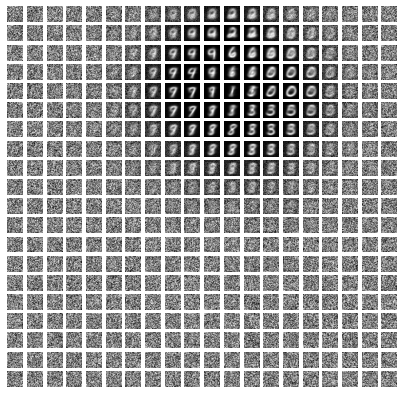

epoch 2/10:
   example 500/5000 ===> winner neuron : (3, 9) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (1, 11) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (0, 11) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (7, 8) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (3, 12) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (5, 9) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (7, 13) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (4, 13) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (3, 8) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (7, 11) , actual label : [5] 


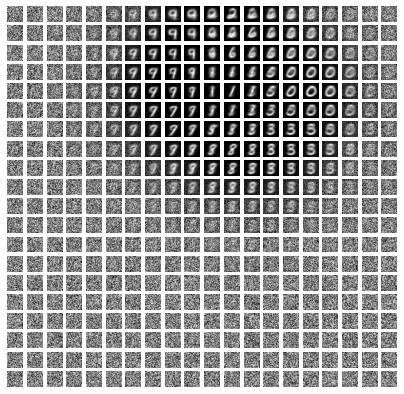

epoch 3/10:
   example 500/5000 ===> winner neuron : (4, 10) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (5, 14) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (3, 13) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (2, 8) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (8, 15) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (8, 13) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (4, 11) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (6, 8) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (3, 15) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (4, 16) , actual label : [5] 


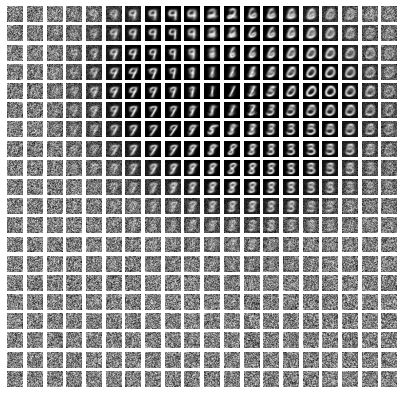

epoch 4/10:
   example 500/5000 ===> winner neuron : (0, 8) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (4, 15) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (8, 13) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (6, 7) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (4, 11) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (8, 11) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (6, 10) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (5, 9) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (8, 14) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (6, 10) , actual label : [5] 


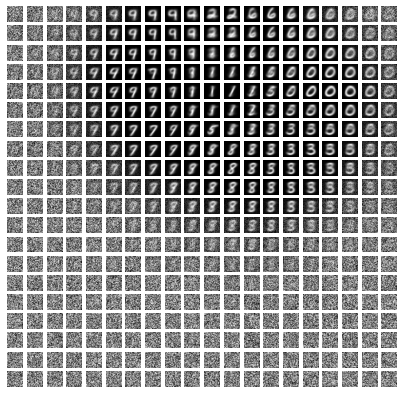

epoch 5/10:
   example 500/5000 ===> winner neuron : (3, 7) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (8, 11) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (4, 11) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (7, 14) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (2, 12) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (8, 12) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (10, 14) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (3, 6) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (4, 11) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (6, 17) , actual label : [5] 


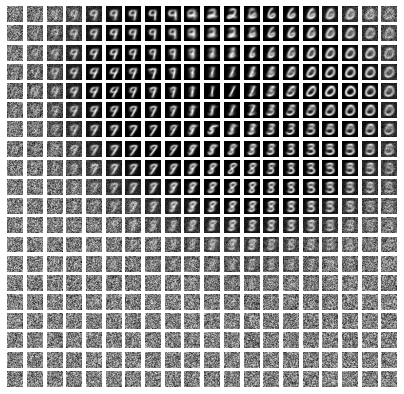

epoch 6/10:
   example 500/5000 ===> winner neuron : (6, 10) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (4, 11) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (10, 14) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (1, 14) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (0, 6) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (4, 11) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (2, 12) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (0, 12) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (0, 14) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (7, 8) , actual label : [5] 


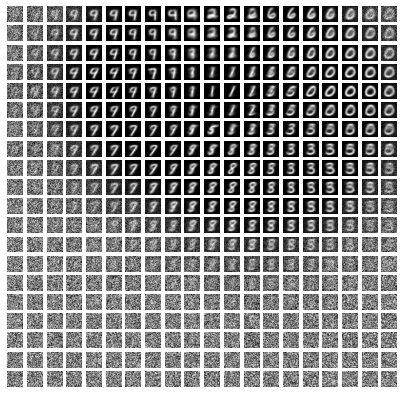

epoch 7/10:
   example 500/5000 ===> winner neuron : (7, 7) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (3, 7) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (5, 5) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (6, 8) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (10, 13) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (4, 11) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (8, 11) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (2, 11) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (1, 9) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (4, 18) , actual label : [5] 


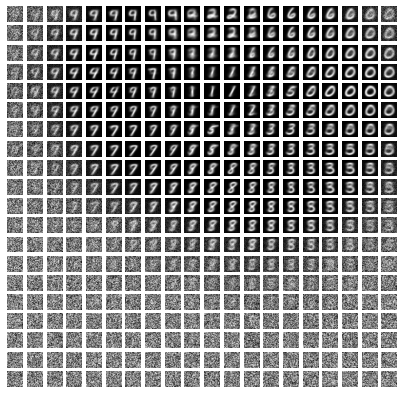

epoch 8/10:
   example 500/5000 ===> winner neuron : (4, 10) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (6, 5) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (3, 7) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (9, 12) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (6, 13) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (5, 4) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (10, 12) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (2, 11) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (4, 10) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (0, 7) , actual label : [5] 


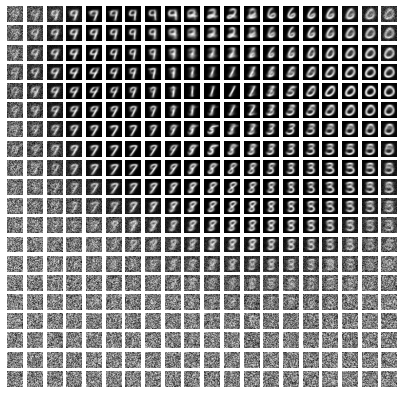

epoch 9/10:
   example 500/5000 ===> winner neuron : (0, 11) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (8, 11) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (7, 15) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (5, 5) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (0, 13) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (4, 9) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (2, 5) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (9, 15) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (4, 11) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (8, 8) , actual label : [5] 


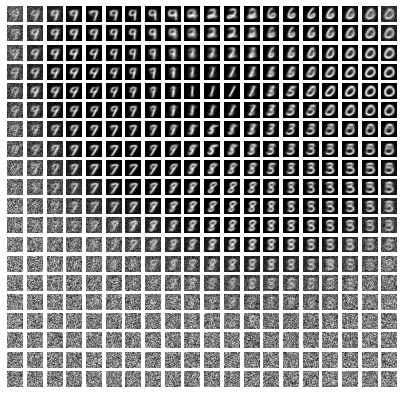

epoch 10/10:
   example 500/5000 ===> winner neuron : (2, 5) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (0, 11) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (0, 11) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (0, 7) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (0, 11) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (6, 5) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (11, 12) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (4, 11) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (2, 13) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (7, 10) , actual label : [5] 


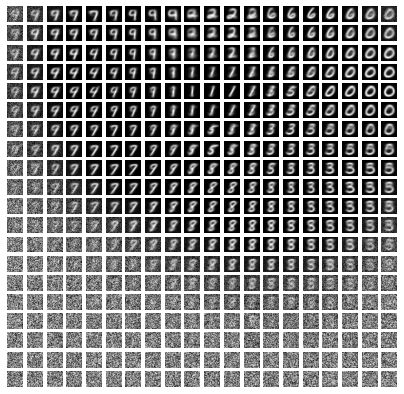

In [93]:
# Q1_graded
input_size = dataset_x[0].shape
kohonen = KohonenMap(20, 20, input_size, 1, 0.01 )
kohonen.train(dataset_x, dataset_y, 10) ## We will go with constant radius at first

epoch 1/10:
   example 500/5000 ===> winner neuron : (15, 10) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (17, 9) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (4, 11) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (5, 10) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (18, 8) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (12, 8) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (12, 8) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (12, 15) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (12, 16) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (9, 19) , actual label : [5] 


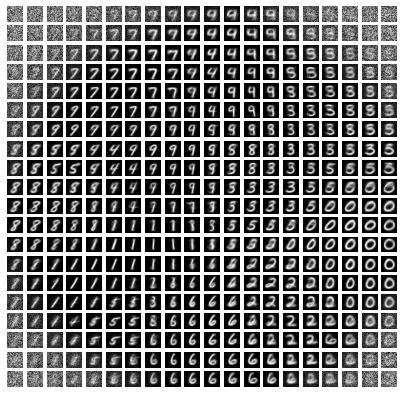

epoch 2/10:
   example 500/5000 ===> winner neuron : (11, 19) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (6, 5) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (16, 14) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (14, 14) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (7, 12) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (18, 2) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (18, 2) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (10, 14) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (12, 7) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (2, 14) , actual label : [5] 


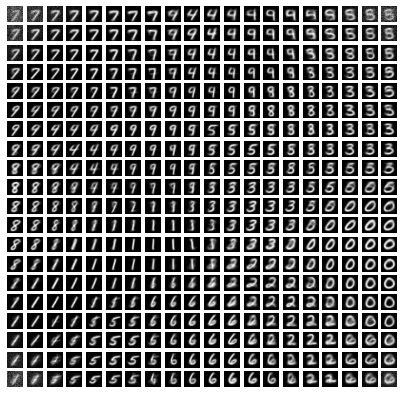

epoch 3/10:
   example 500/5000 ===> winner neuron : (14, 4) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (5, 15) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (11, 19) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (9, 0) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (16, 0) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (2, 2) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (12, 8) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (7, 19) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (14, 12) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (7, 17) , actual label : [5] 


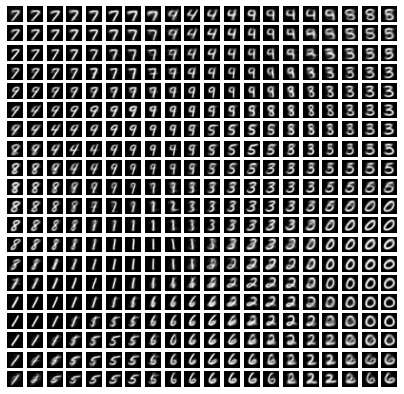

epoch 4/10:
   example 500/5000 ===> winner neuron : (3, 12) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (0, 12) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (12, 2) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (19, 6) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (18, 5) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (14, 0) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (3, 0) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (6, 19) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (0, 1) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (5, 4) , actual label : [5] 


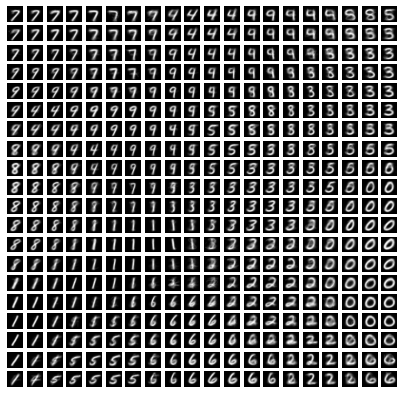

epoch 5/10:
   example 500/5000 ===> winner neuron : (17, 13) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (9, 14) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (19, 3) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (16, 19) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (8, 17) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (3, 19) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (1, 11) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (17, 14) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (7, 19) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (2, 13) , actual label : [5] 


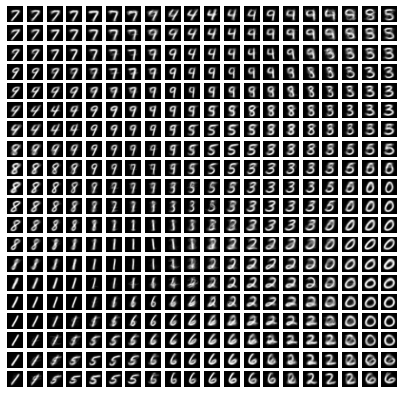

epoch 6/10:
   example 500/5000 ===> winner neuron : (19, 8) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (0, 8) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (14, 3) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (0, 4) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (10, 19) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (19, 5) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (5, 13) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (17, 18) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (0, 18) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (18, 0) , actual label : [5] 


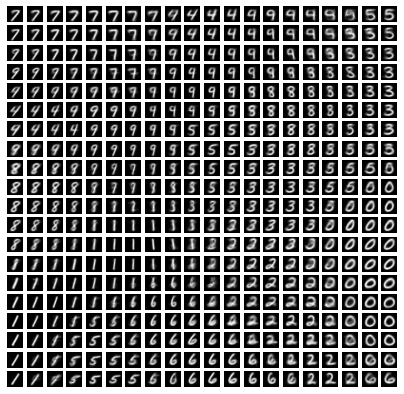

epoch 7/10:
   example 500/5000 ===> winner neuron : (18, 14) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (2, 14) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (0, 6) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (15, 6) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (16, 8) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (19, 9) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (19, 0) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (16, 6) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (0, 3) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (19, 12) , actual label : [5] 


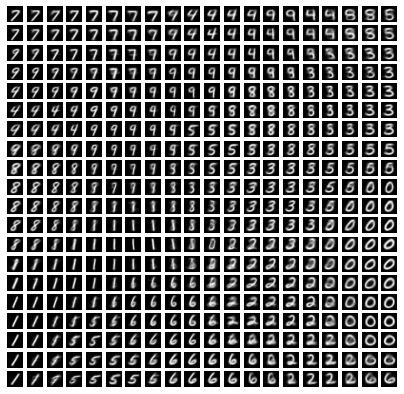

epoch 8/10:
   example 500/5000 ===> winner neuron : (9, 5) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (1, 19) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (19, 9) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (16, 0) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (5, 8) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (7, 15) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (4, 19) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (4, 15) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (19, 11) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (8, 11) , actual label : [5] 


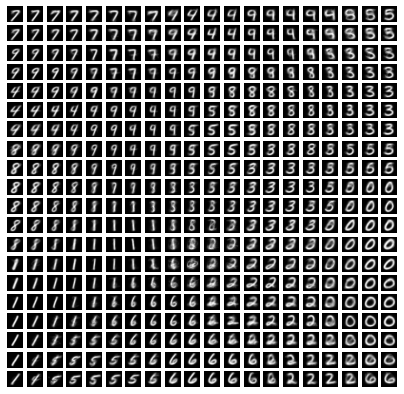

epoch 9/10:
   example 500/5000 ===> winner neuron : (6, 0) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (13, 19) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (5, 16) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (5, 12) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (7, 13) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (16, 19) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (19, 19) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (12, 1) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (5, 13) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (8, 2) , actual label : [5] 


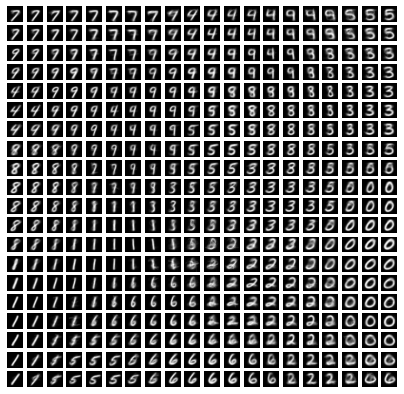

epoch 10/10:
   example 500/5000 ===> winner neuron : (11, 17) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (0, 7) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (14, 3) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (10, 12) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (19, 19) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (2, 13) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (0, 11) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (16, 6) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (15, 8) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (9, 0) , actual label : [5] 


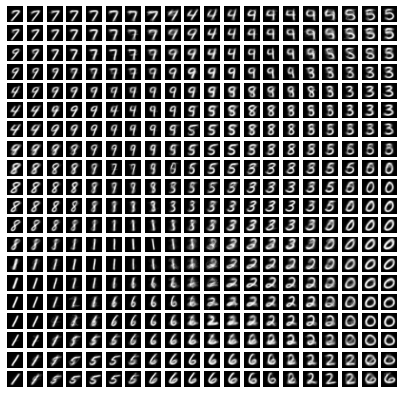

In [94]:
kohonen = KohonenMap(20, 20, input_size, 1, 0.1 )
kohonen.train(dataset_x, dataset_y, 10) 

epoch 1/10:
   example 500/5000 ===> winner neuron : (6, 15) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (7, 15) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (6, 18) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (6, 11) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (6, 17) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (10, 14) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (5, 10) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (4, 11) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (8, 9) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (9, 14) , actual label : [5] 


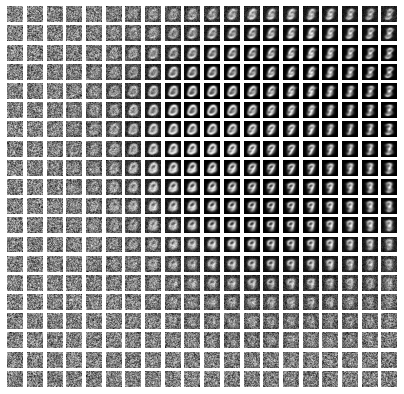

epoch 2/10:
   example 500/5000 ===> winner neuron : (12, 13) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (12, 15) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (8, 14) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (11, 19) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (10, 14) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (10, 9) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (2, 10) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (9, 18) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (4, 7) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (3, 19) , actual label : [5] 


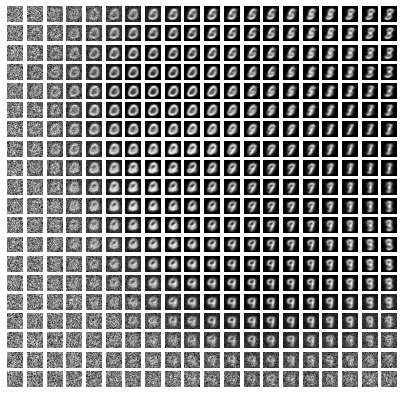

epoch 3/10:
   example 500/5000 ===> winner neuron : (11, 19) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (8, 18) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (8, 9) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (4, 6) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (8, 9) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (16, 11) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (3, 13) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (15, 9) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (6, 19) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (0, 16) , actual label : [5] 


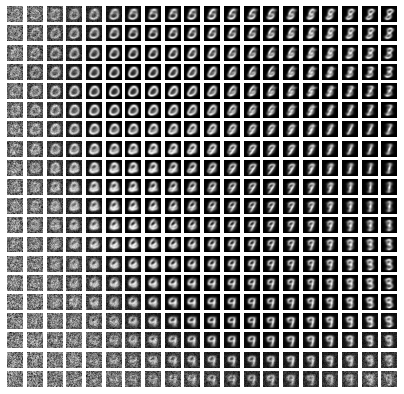

epoch 4/10:
   example 500/5000 ===> winner neuron : (4, 6) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (11, 10) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (16, 16) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (10, 14) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (14, 19) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (12, 19) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (11, 8) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (16, 15) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (6, 18) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (16, 11) , actual label : [5] 


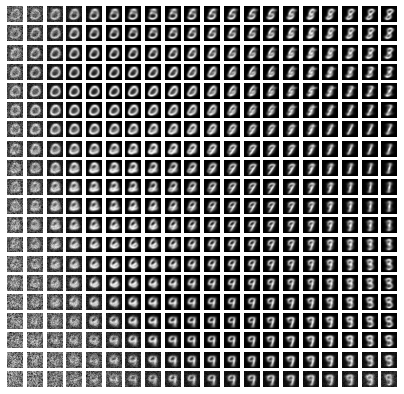

epoch 5/10:
   example 500/5000 ===> winner neuron : (12, 6) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (1, 19) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (8, 13) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (0, 12) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (12, 6) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (5, 19) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (11, 11) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (0, 17) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (13, 4) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (7, 18) , actual label : [5] 


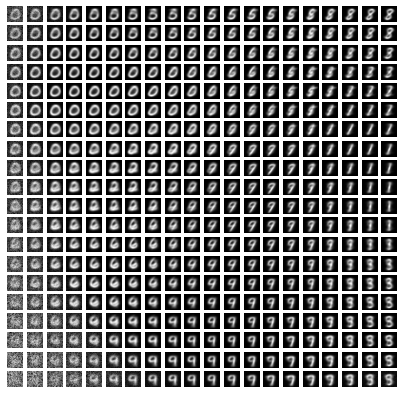

epoch 6/10:
   example 500/5000 ===> winner neuron : (2, 3) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (12, 10) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (4, 7) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (4, 15) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (3, 8) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (12, 11) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (13, 10) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (3, 19) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (4, 5) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (6, 15) , actual label : [5] 


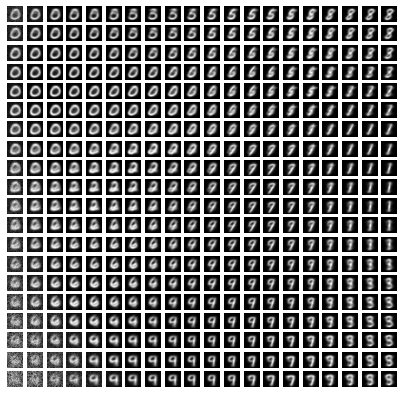

epoch 7/10:
   example 500/5000 ===> winner neuron : (19, 18) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (0, 19) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (10, 19) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (3, 2) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (0, 6) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (0, 8) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (3, 4) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (0, 8) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (8, 12) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (19, 14) , actual label : [5] 


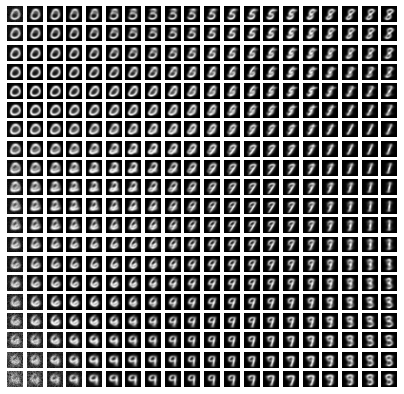

epoch 8/10:
   example 500/5000 ===> winner neuron : (0, 8) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (14, 18) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (18, 14) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (18, 19) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (0, 8) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (0, 9) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (15, 10) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (13, 5) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (9, 5) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (6, 17) , actual label : [5] 


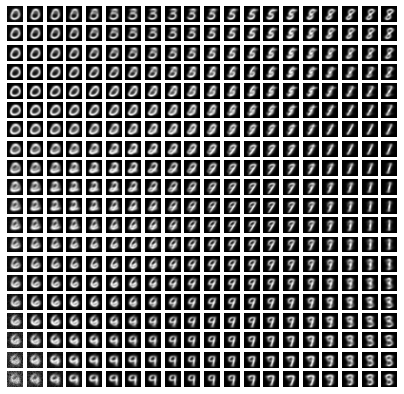

epoch 9/10:
   example 500/5000 ===> winner neuron : (15, 10) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (2, 7) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (15, 1) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (19, 4) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (14, 2) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (3, 12) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (11, 19) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (4, 14) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (3, 12) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (2, 19) , actual label : [5] 


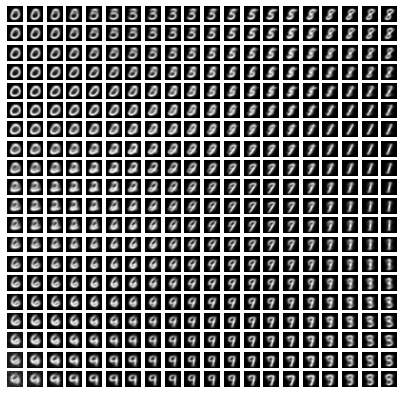

epoch 10/10:
   example 500/5000 ===> winner neuron : (0, 13) , actual label : [8] 
   example 1000/5000 ===> winner neuron : (0, 9) , actual label : [6] 
   example 1500/5000 ===> winner neuron : (1, 19) , actual label : [7] 
   example 2000/5000 ===> winner neuron : (11, 10) , actual label : [0] 
   example 2500/5000 ===> winner neuron : (12, 14) , actual label : [2] 
   example 3000/5000 ===> winner neuron : (18, 19) , actual label : [5] 
   example 3500/5000 ===> winner neuron : (13, 5) , actual label : [8] 
   example 4000/5000 ===> winner neuron : (14, 13) , actual label : [6] 
   example 4500/5000 ===> winner neuron : (8, 9) , actual label : [7] 
   example 5000/5000 ===> winner neuron : (6, 17) , actual label : [5] 


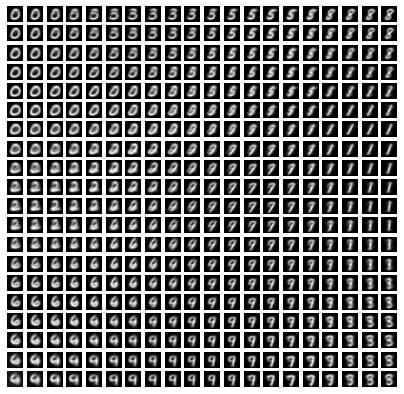

In [95]:
kohonen = KohonenMap(20, 20, input_size, 1, 0.01 )
kohonen.train(dataset_x, dataset_y, 10, True) ## We will go with constant radius at first

# Q4. RBF



In [96]:
# Q4_graded
NUM_SAMPLES = 1000
x = np.random.uniform(0., 1., NUM_SAMPLES)
x = np.sort(x, axis=0)
noise = np.random.uniform(-0.2, 0.2, NUM_SAMPLES)
y = 1/3 + np.sin(3 * np.pi * x)  + noise

idx = np.random.choice(np.arange(len(x)), 200, replace=False)
idx = np.sort(idx, axis=0)
x_test_plot = x[idx]
y_test_plot = y[idx]

x = np.delete(x, idx)
y = np.delete(y, idx)

x_train = np.reshape(x,(NUM_SAMPLES - 200,1))
y_train = np.reshape(y,(NUM_SAMPLES - 200,1))
x_test = np.reshape(x_test_plot,(200,1))
y_test = np.reshape(y_test_plot,(200,1))

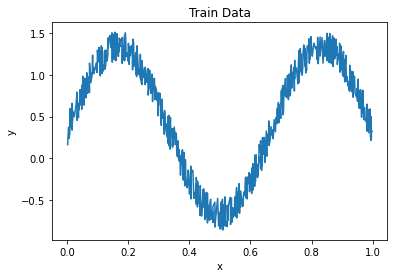

In [97]:
# Q4_graded
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.title('Train Data')
plt.show()

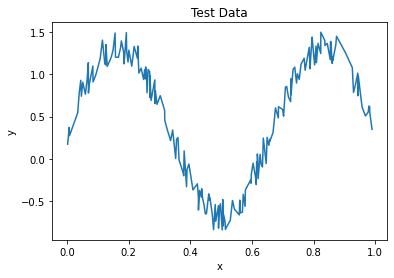

In [98]:
# Q4_graded
plt.plot(x_test_plot, y_test_plot)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.title('Test Data')
plt.show()

In [99]:
# Q4_graded
model = Sequential()
model.add(Dense(32, input_dim=1, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=128, shuffle=True)

Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6879
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6630
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6384
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6122
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5869
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5612
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5369
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5171
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5004
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4888
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4804
Epoch 12/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4757
Epoch 13/100
7/7 [==============================] - 0s 3ms/st

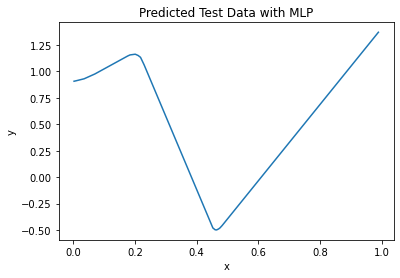

In [100]:
# Q4_graded
y_pred_mlp = model.predict(x_test)
plt.plot(x_test_plot, np.squeeze(y_pred_mlp))
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.title('Predicted Test Data with MLP')
plt.show()

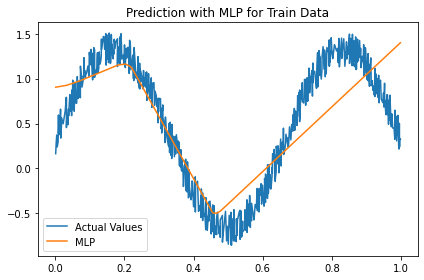

In [101]:
# Q4_graded
y_pred_train_mlp = model.predict(x_train)
plt.plot(x, y, label='Actual Values')
plt.plot(x, np.squeeze(y_pred_train_mlp), label='MLP')
plt.title("Prediction with MLP for Train Data")
plt.legend()
plt.tight_layout()
plt.show()

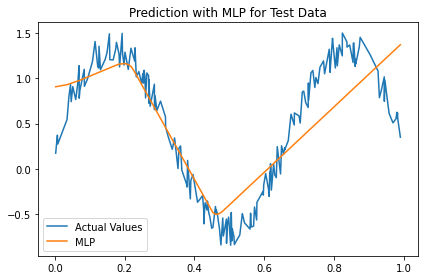

In [102]:
# Q4_graded
plt.plot(x_test_plot, y_test_plot, label='Actual Values')
plt.plot(x_test_plot, np.squeeze(y_pred_mlp), label='MLP')
plt.title("Prediction with MLP for Test Data")
plt.legend()
plt.tight_layout()
plt.show()

In [103]:
# Q4_graded
class RBF:
   
   def __init__(self, k, lr, center_algorithm='kmeans'):

     self.k = k
     self.lr = lr
     self.center_init = self.choose_algorithm(center_algorithm)
     self.w = np.random.rand(k, 1)

   def choose_algorithm(self, algorithm):
     if algorithm == 'kmeans':
       return self.K_means_Clustring

   def K_means_Clustring(self, x, max_iteration=300):
     centers = np.random.choice(np.squeeze(x), size=self.k)
     prevCenters = centers.copy()
     converged = False   
     current_iteration = 0
     clusters_points = [None] * self.k

     while (not converged) and (current_iteration < max_iteration):
          distances = np.abs(x - centers)
          closestCluster = np.argmin(distances, axis=1)
          for i in range(self.k):
              pointsForCluster = x[closestCluster == i]
              if len(pointsForCluster) > 0:
                  centers[i] = np.mean(pointsForCluster, axis=0)
                  clusters_points[i] = pointsForCluster

          convergance_number = np.float32(1e-4)
          converged = np.sum(np.abs(prevCenters - centers)) < convergance_number
          prevCenters = centers.copy()
          current_iteration += 1


     return np.array(centers), np.array([np.std(cluster) for cluster in clusters_points])

   def rbf(self, x, c, s):
    return np.exp((-1 * (x-c)**2) / s**2)

   def fit(self, X, y, epochs):
     self.centers, self.widths = self.center_init(X)
     for epoch in range(epochs):
        print(f'epoch {epoch+1}/{epochs}:')
        for i in range(X.shape[0]):
            a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.widths)])
            approximation = np.sum(a * self.w)
            loss = (y[i] - approximation).flatten() ** 2
            if (i + 1) % 100 == 0:
              print(f'{i+1}/{X.shape[0]}    Loss: {loss}')
            error = np.sum(-(y[i] - approximation))
            self.w = self.w - self.lr * a * error
            
   def predict(self, X):
     count = X.shape[0]
     prediction = []
     for i in range(count):
       a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.widths)])
       approximation = np.sum(a * self.w)
       prediction.append(approximation)
     return np.array(prediction)


In [104]:
# Q4_graded
RBF_Network = RBF(2, 0.01, 'kmeans')
RBF_Network.fit(x_train, y_train, 100)

epoch 1/100:
100/800    Loss: [0.56723495]
200/800    Loss: [0.00473031]
300/800    Loss: [0.33466617]
400/800    Loss: [0.78534296]
500/800    Loss: [0.04223975]
600/800    Loss: [0.58008151]
700/800    Loss: [0.6668645]
800/800    Loss: [0.06776614]
epoch 2/100:
100/800    Loss: [0.41935237]
200/800    Loss: [0.00219319]
300/800    Loss: [0.36874263]
400/800    Loss: [0.91871714]
500/800    Loss: [0.41210028]
600/800    Loss: [0.08829498]
700/800    Loss: [0.51341459]
800/800    Loss: [0.06058526]
epoch 3/100:
100/800    Loss: [0.38761165]
200/800    Loss: [0.00550504]
300/800    Loss: [0.37706805]
400/800    Loss: [0.95294988]
500/800    Loss: [0.56078432]
600/800    Loss: [0.03362312]
700/800    Loss: [0.47888109]
800/800    Loss: [0.05888756]
epoch 4/100:
100/800    Loss: [0.38029675]
200/800    Loss: [0.00650596]
300/800    Loss: [0.37905274]
400/800    Loss: [0.96142282]
500/800    Loss: [0.60069077]
600/800    Loss: [0.02417873]
700/800    Loss: [0.47060515]
800/800    Loss: [0

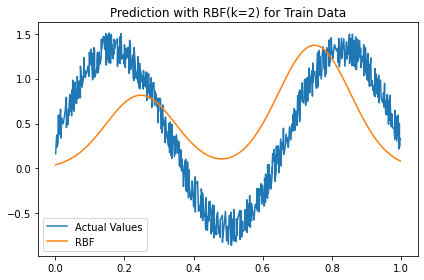

In [105]:
# Q4_graded
train_rbf_2 = RBF_Network.predict(x_train)
plt.plot(x, y, label='Actual Values')
plt.plot(x, np.squeeze(train_rbf_2), label='RBF')
plt.title("Prediction with RBF(k=2) for Train Data")
plt.legend()
plt.tight_layout()
plt.show()

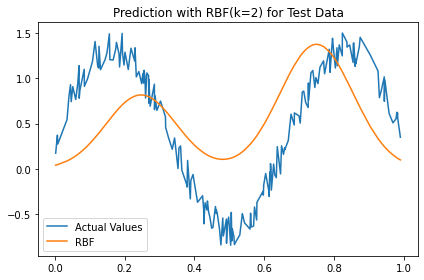

In [106]:
# Q4_graded
test_rbf_2 = RBF_Network.predict(x_test)
plt.plot(x_test_plot, y_test_plot, label='Actual Values')
plt.plot(x_test_plot, np.squeeze(test_rbf_2), label='RBF')
plt.title("Prediction with RBF(k=2) for Test Data")
plt.legend()
plt.tight_layout()
plt.show()

In [107]:
# Q4_graded
RBF_Network_3 = RBF(3, 0.01, 'kmeans')
RBF_Network_3.fit(x_train, y_train, 100)

epoch 1/100:
100/800    Loss: [0.07834858]
200/800    Loss: [0.21760763]
300/800    Loss: [0.08528501]
400/800    Loss: [0.7310269]
500/800    Loss: [0.01913076]
600/800    Loss: [0.89535843]
700/800    Loss: [0.19378362]
800/800    Loss: [0.05780742]
epoch 2/100:
100/800    Loss: [0.0015975]
200/800    Loss: [0.13808885]
300/800    Loss: [0.03792541]
400/800    Loss: [0.18533486]
500/800    Loss: [0.00573224]
600/800    Loss: [0.49904046]
700/800    Loss: [0.02313198]
800/800    Loss: [0.04755855]
epoch 3/100:
100/800    Loss: [0.02591668]
200/800    Loss: [0.11270504]
300/800    Loss: [0.02450538]
400/800    Loss: [0.06968892]
500/800    Loss: [0.00262205]
600/800    Loss: [0.37057951]
700/800    Loss: [0.00120786]
800/800    Loss: [0.04367096]
epoch 4/100:
100/800    Loss: [0.04276146]
200/800    Loss: [0.10377208]
300/800    Loss: [0.02003302]
400/800    Loss: [0.03946132]
500/800    Loss: [0.00173152]
600/800    Loss: [0.32372635]
700/800    Loss: [0.00016981]
800/800    Loss: [0.

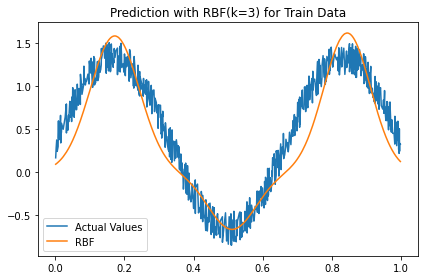

In [108]:
# Q4_graded
train_rbf_3 = RBF_Network_3.predict(x_train)
plt.plot(x, y, label='Actual Values')
plt.plot(x, np.squeeze(train_rbf_3), label='RBF')
plt.title("Prediction with RBF(k=3) for Train Data")
plt.legend()
plt.tight_layout()
plt.show()

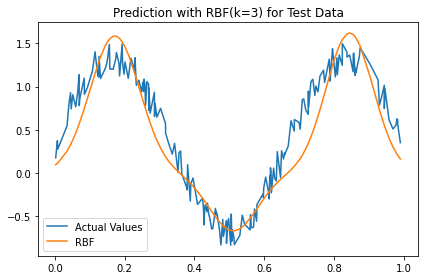

In [109]:
# Q4_graded
test_rbf_3 = RBF_Network_3.predict(x_test)
plt.plot(x_test_plot, y_test_plot, label='Actual Values')
plt.plot(x_test_plot, np.squeeze(test_rbf_3), label='RBF')
plt.title("Prediction with RBF(k=3) for Test Data")
plt.legend()
plt.tight_layout()
plt.show()

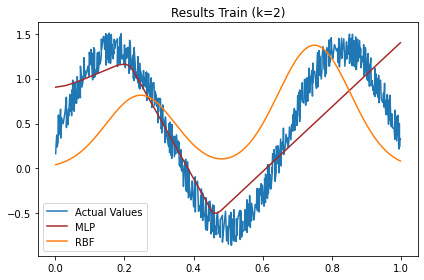

In [110]:
# Q4_graded
plt.plot(x, y, label='Actual Values')
plt.plot(x, np.squeeze(y_pred_train_mlp), label='MLP', color='brown')
plt.plot(x, np.squeeze(train_rbf_2), label='RBF')
plt.title("Results Train (k=2)")
plt.legend()
plt.tight_layout()
plt.show()

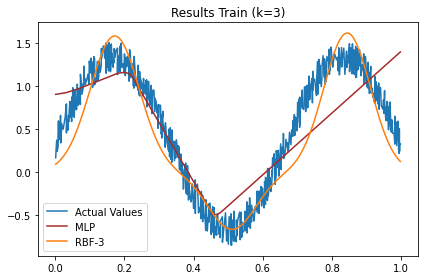

In [111]:
# Q4_graded
plt.plot(x, y, label='Actual Values')
plt.plot(x, np.squeeze(y_pred_train_mlp), label='MLP', color='brown')
plt.plot(x, np.squeeze(train_rbf_3), label='RBF-3')
plt.title("Results Train (k=3)")
plt.legend()
plt.tight_layout()
plt.show()

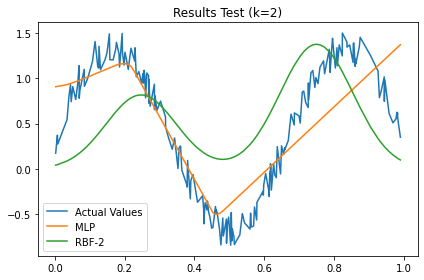

In [112]:
# Q4_graded
plt.plot(x_test_plot, y_test_plot, label='Actual Values')
plt.plot(x_test_plot, np.squeeze(y_pred_mlp), label='MLP')
plt.plot(x_test_plot, np.squeeze(test_rbf_2), label='RBF-2')
plt.title("Results Test (k=2)")
plt.legend()
plt.tight_layout()
plt.show()

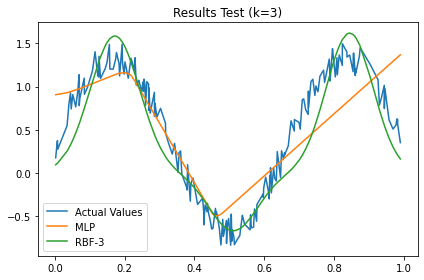

In [113]:
# Q4_graded
plt.plot(x_test_plot, y_test_plot, label='Actual Values')
plt.plot(x_test_plot, np.squeeze(y_pred_mlp), label='MLP')
plt.plot(x_test_plot, np.squeeze(test_rbf_3), label='RBF-3')
plt.title("Results Test (k=3)")
plt.legend()
plt.tight_layout()
plt.show()

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID.
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/bdpVdvr/image.png)
  
    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI002_HW2.ipynb`
    - `Q1.py`
    - `Q4.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.